In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy import stats
import matplotlib
import matplotlib.animation as animation
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import warnings
import matplotlib.path as mpath
import intake
import pandas as pd
import s3fs
import proplot as pplt
warnings.filterwarnings("ignore")

In [3]:
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')
#netcdf library, but there's not much here
#catalog = intake.open_esm_datastore('https://cmip6-nc.s3.amazonaws.com/esgf-world.json')

In [4]:
variable_id = "prsn" #snowfall flux (kg/(m2 s))
table_id = "Amon"
grid = "gn"
experiment_ids = ['historical', 'ssp585']
res = catalog.search(experiment_id=experiment_ids,\
                     table_id=table_id, variable_id=variable_id)
models = res.df['source_id'].unique()
print((res.df['source_id'].unique()))

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'CNRM-ESM2-1' 'BCC-ESM1' 'MRI-ESM2-0' 'MIROC6'
 'SAM0-UNICON' 'GISS-E2-1-H' 'UKESM1-0-LL' 'CanESM5' 'CanESM5-CanOE'
 'AWI-CM-1-1-MR' 'INM-CM4-8' 'EC-Earth3-Veg' 'HadGEM3-GC31-LL' 'EC-Earth3'
 'MPI-ESM-1-2-HAM' 'NESM3' 'INM-CM5-0' 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR'
 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM' 'GISS-E2-1-G-CC' 'FGOALS-g3'
 'MIROC-ES2L' 'KACE-1-0-G' 'FGOALS-f3-L' 'NorESM2-MM' 'ACCESS-CM2'
 'ACCESS-ESM1-5' 'CESM2-WACCM-FV2' 'CESM2-FV2' 'CNRM-CM6-1-HR' 'E3SM-1-1'
 'CESM2' 'E3SM-1-1-ECA' 'CESM2-WACCM' 'AWI-ESM-1-1-LR' 'CAS-ESM2-0'
 'CMCC-CM2-SR5' 'TaiESM1' 'EC-Earth3-AerChem' 'NorCPM1' 'CMCC-CM2-HR4']


In [5]:
variable_id = "prsn" #snowfall flux (kg/(m2 s))
table_id = "Amon"
grid = "gn"
experiment_ids = ['historical', 'ssp585']
model_yes = []
for i in models:
    res = catalog.search(source_id=i, variable_id=variable_id, experiment_id=experiment_ids, table_id=table_id) #with Table_id
    if len(res.df['experiment_id'].unique())==len(experiment_ids):
        model_yes.append(i)

print(model_yes)

['GFDL-CM4', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'CNRM-CM6-1', 'BCC-CSM2-MR', 'CNRM-ESM2-1', 'MRI-ESM2-0', 'MIROC6', 'UKESM1-0-LL', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8', 'EC-Earth3-Veg', 'EC-Earth3', 'INM-CM5-0', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MCM-UA-1-0', 'FGOALS-g3', 'MIROC-ES2L', 'KACE-1-0-G', 'ACCESS-CM2']


In [17]:
res = catalog.search(source_id='CESM2', variable_id=variable_id, experiment_id=experiment_ids)
print(res.df)

    activity_id institution_id source_id experiment_id  member_id table_id  \
0          CMIP           NCAR     CESM2    historical   r1i1p1f1     Amon   
1          CMIP           NCAR     CESM2    historical  r11i1p1f1      day   
2          CMIP           NCAR     CESM2    historical  r11i1p1f1     Amon   
3          CMIP           NCAR     CESM2    historical  r10i1p1f1     Amon   
4          CMIP           NCAR     CESM2    historical   r4i1p1f1     Amon   
5          CMIP           NCAR     CESM2    historical   r8i1p1f1     Amon   
6          CMIP           NCAR     CESM2    historical   r6i1p1f1     Amon   
7          CMIP           NCAR     CESM2    historical   r2i1p1f1     Amon   
8          CMIP           NCAR     CESM2    historical   r7i1p1f1     Amon   
9          CMIP           NCAR     CESM2    historical   r3i1p1f1     Amon   
10         CMIP           NCAR     CESM2    historical   r5i1p1f1     Amon   
11         CMIP           NCAR     CESM2    historical   r9i1p1f

In [30]:
res = catalog.search(source_id=model_yes[0], variable_id=variable_id, experiment_id=experiment_ids[0])
for i in range(0,len(res.df['zstore'])):
    print(res.df['zstore'][i])
    fs_s3 = s3fs.S3FileSystem(anon=True)
    mapper = fs_s3.get_mapper(res.df['zstore'][i])
    ds = xr.open_zarr(mapper, consolidated=True)

s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r2i1p1f1/Amon/prsn/gn/v20181115/
s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r3i1p1f1/Amon/prsn/gn/v20181119/
s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/prsn/gn/v20181126/
s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/prsn/gn/v20181127/
<xarray.Dataset>
Dimensions:    (lat: 160, bnds: 2, lon: 320, time: 23725)
Coordinates:
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(160, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(320, 2), meta=np.ndarray>
  * time       (time) object 1950-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(11863, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    prsn       (time, lat, lon) flo

In [34]:
prsn_test = ds.prsn.sel(time=slice('1950-01-01','1979-12-31'),lat=slice(-90., -60.)).mean(dim='time')
print(prsn_test)

<xarray.DataArray 'prsn' (lat: 26, lon: 320)>
dask.array<mean_agg-aggregate, shape=(26, 320), dtype=float32, chunksize=(26, 320), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... -63.36 -62.24 -61.12
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9


In [36]:
print(np.array(prsn_test))

[[2.34646723e-06 2.33677906e-06 2.33261449e-06 ... 2.37501399e-06
  2.36662891e-06 2.35424545e-06]
 [2.16297303e-06 2.14863280e-06 2.12787154e-06 ... 2.21908203e-06
  2.19980598e-06 2.18252626e-06]
 [2.00835757e-06 1.98969497e-06 1.96426458e-06 ... 2.08237088e-06
  2.06034156e-06 2.03388731e-06]
 ...
 [1.39613003e-05 1.40163438e-05 1.40754501e-05 ... 1.39845697e-05
  1.40038610e-05 1.39546637e-05]
 [1.37758580e-05 1.38450596e-05 1.39087560e-05 ... 1.36044036e-05
  1.36987583e-05 1.37881116e-05]
 [1.29820955e-05 1.30771487e-05 1.32256973e-05 ... 1.30143826e-05
  1.30150738e-05 1.29496484e-05]]


In [6]:
#set up dictionaries
prsn_dict_1950_1980 = {}
lats = {}
lons = {}

#set up AWS filesystem access
fs_s3 = s3fs.S3FileSystem(anon=True)

for imodel in range(0,len(model_yes)):
    print(model_yes[imodel])
    res = catalog.search(source_id=model_yes[imodel], variable_id=variable_id,\
                         experiment_id=experiment_ids[0], table_id=table_id)
    for j in range(0,1):#range(0,len(res.df["zstore"])):
        print(res.df['zstore'][j])
        mapper = fs_s3.get_mapper(res.df['zstore'][j])
        ds = xr.open_zarr(mapper, consolidated=True)
        if j==0:
            try:
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
            except AttributeError:
                ds = ds.rename({"latitude":"lat", "longitude":"lon"})
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
        try:
            prsn_dict_1950_1980[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('1950-01','1979-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")
        except (AttributeError, KeyError):
            ds = ds.rename({"latitude":"lat", "longitude":"lon"})
            prsn_dict_1950_1980[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('1950-01','1979-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")

GFDL-CM4
s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Amon/prsn/gr1/v20180701/
GFDL-ESM4
s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r3i1p1f1/Amon/prsn/gr1/v20180701/
IPSL-CM6A-LR
s3://cmip6-pds/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r4i1p1f1/Amon/prsn/gr/v20180803/
CNRM-CM6-1
s3://cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/Amon/prsn/gr/v20180917/
BCC-CSM2-MR
s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r2i1p1f1/Amon/prsn/gn/v20181115/
CNRM-ESM2-1
s3://cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/Amon/prsn/gr/v20181206/
MRI-ESM2-0
s3://cmip6-pds/CMIP6/CMIP/MRI/MRI-ESM2-0/historical/r5i1p1f1/Amon/prsn/gn/v20190222/
MIROC6
s3://cmip6-pds/CMIP6/CMIP/MIROC/MIROC6/historical/r8i1p1f1/Amon/prsn/gn/v20190311/
UKESM1-0-LL
s3://cmip6-pds/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/prsn/gn/v20190406/
CanESM5
s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/historical/r11i1p2f1/Amon/prsn/gn/v20190429/
CanESM5-Can

In [13]:
#set up dictionaries
prsn_dict_2070_2100 = {}
lats = {}
lons = {}

#set up AWS filesystem access
fs_s3 = s3fs.S3FileSystem(anon=True)

for imodel in range(0,len(model_yes)):
    print(model_yes[imodel])
    res = catalog.search(source_id=model_yes[imodel], variable_id=variable_id,\
                         experiment_id=experiment_ids[1], table_id=table_id)
    for j in range(0,1):#range(0,len(res.df["zstore"])):
        print(res.df['zstore'][j])
        mapper = fs_s3.get_mapper(res.df['zstore'][j])
        ds = xr.open_zarr(mapper, consolidated=True)
        if j==0:
            try:
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
            except AttributeError:
                ds = ds.rename({"latitude":"lat", "longitude":"lon"})
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
        try:
            prsn_dict_2070_2100[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('2070-01','2099-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")
        except (AttributeError, KeyError):
            ds = ds.rename({"latitude":"lat", "longitude":"lon"})
            prsn_dict_2070_2100[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('2070-01','2099-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")

GFDL-CM4
s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp585/r1i1p1f1/Amon/prsn/gr1/v20180701/
GFDL-ESM4
s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Amon/prsn/gr1/v20180701/
IPSL-CM6A-LR
s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/Amon/prsn/gr/v20190903/
CNRM-CM6-1
s3://cmip6-pds/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1/ssp585/r1i1p1f2/Amon/prsn/gr/v20190219/
BCC-CSM2-MR
s3://cmip6-pds/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp585/r1i1p1f1/Amon/prsn/gn/v20190314/
CNRM-ESM2-1
s3://cmip6-pds/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp585/r3i1p1f2/Amon/prsn/gr/v20190410/
MRI-ESM2-0
s3://cmip6-pds/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ssp585/r1i1p1f1/Amon/prsn/gn/v20191108/
MIROC6
s3://cmip6-pds/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp585/r3i1p1f1/Amon/prsn/gn/v20190627/
UKESM1-0-LL
s3://cmip6-pds/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r4i1p1f2/Amon/prsn/gn/v20190507/
CanESM5
s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r22i1p1f1/Amon/

22


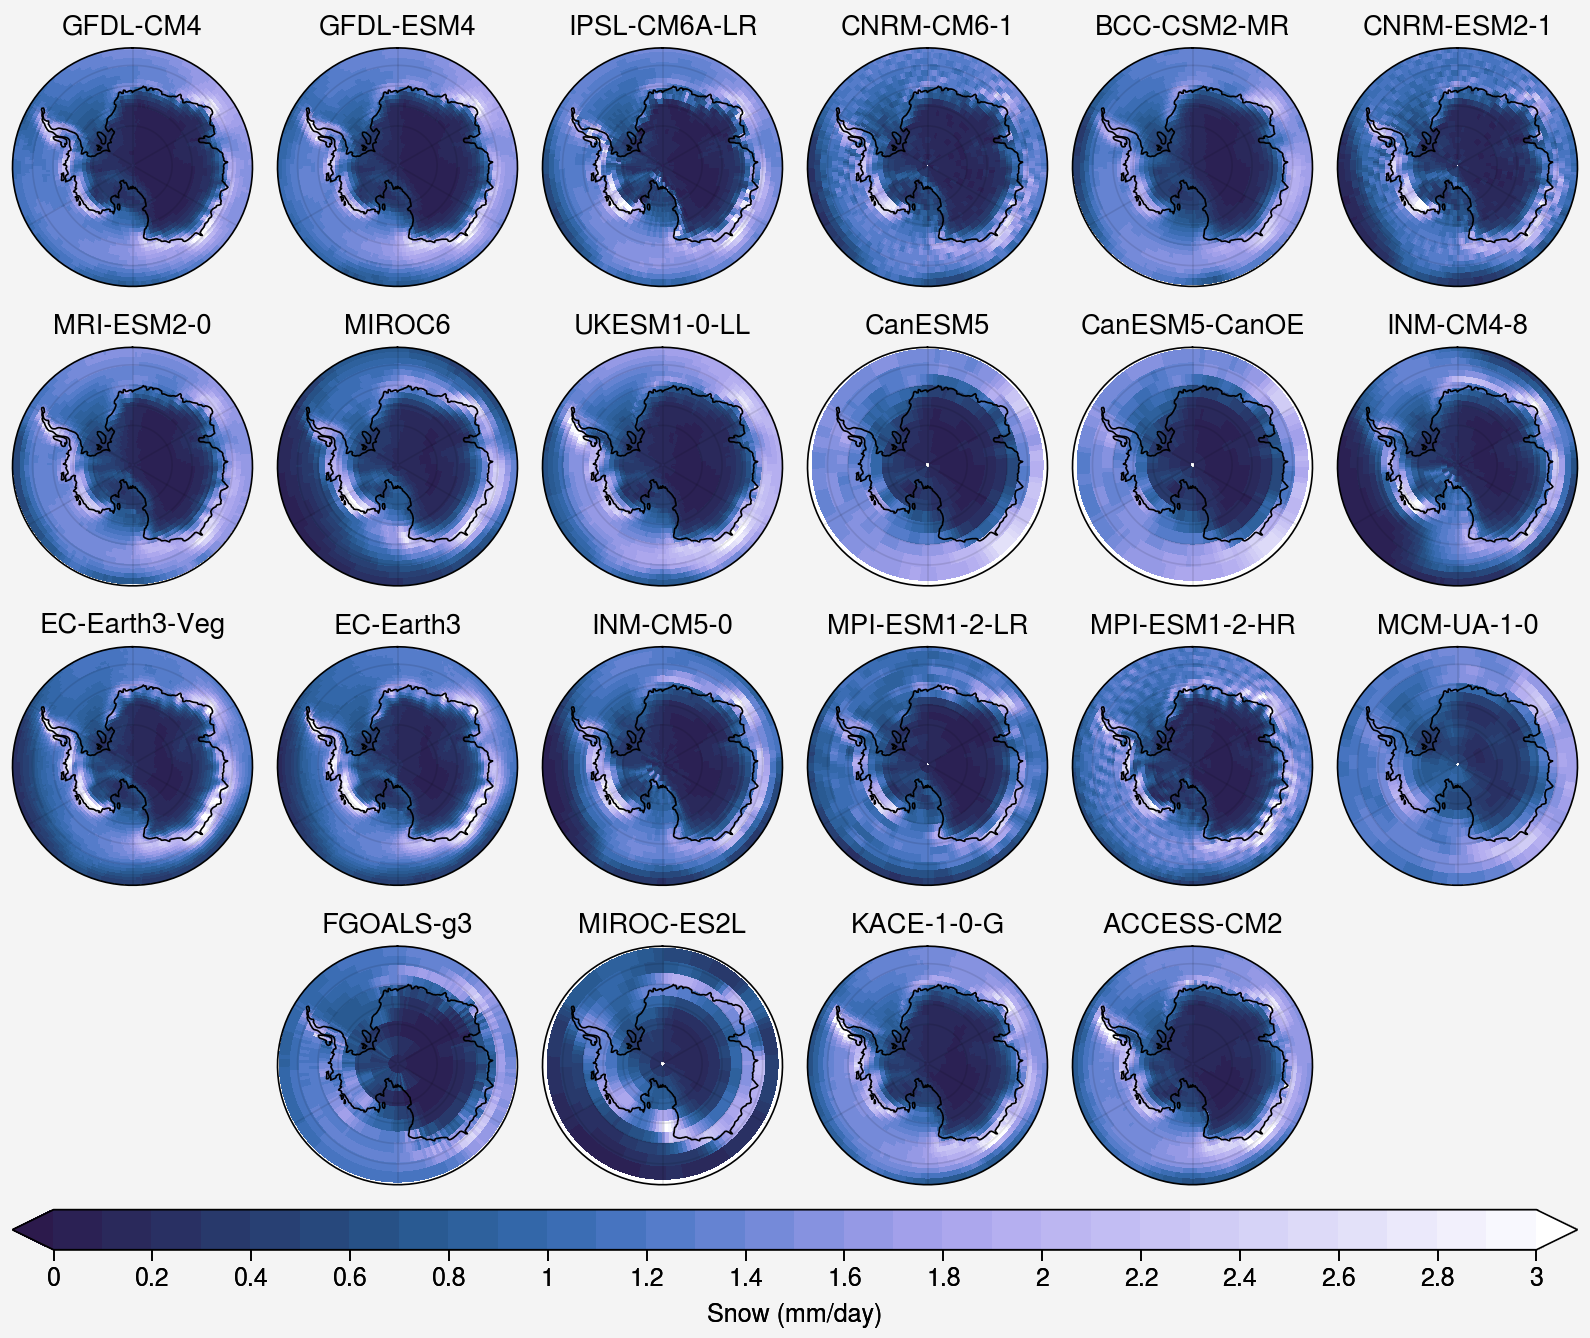

In [12]:
#try out proplot figure
precconv = 3600.*24. #kg/m^2/s*(m^3/1000kg)*(3600*24 s/day)*(1000mm/m)
cmap = 'devon'
conts = np.linspace(0.,3.,31)
basemap = pplt.Proj('spstere')
mysps = [[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[0,19,20,21,22,0]]
fig, axs = pplt.subplots(mysps, refwidth=1.2, proj=basemap)
axs.format(boundinglat=-60., coast=True)

print(len(axs))

for i in range(0,len(model_yes)):
    mylon = lons[model_yes[i]]
    mylat = lats[model_yes[i]]
    m = axs[i].pcolormesh(mylon, mylat, precconv*prsn_dict_1950_1980[model_yes[i]+"_0"], levels=conts, cmap=cmap, extend='both')
    axs[i].set_title(model_yes[i])
    
fig.colorbar(m, loc='b', label='Snow (mm/day)', extendsize='1.7em')
plt.savefig("CMIP6_Snow_1950to1980_042022.pdf")

In [15]:
print(np.shape(prsn_dict_2070_2100["EC-Earth3_0"]))
print(np.shape(prsn_dict_1950_1980["EC-Earth3_0"]))
print(np.shape(lats["EC-Earth3"]))
print(np.shape(lons["EC-Earth3"]))

(42, 512)
(42, 512)
(42,)
(512,)


22


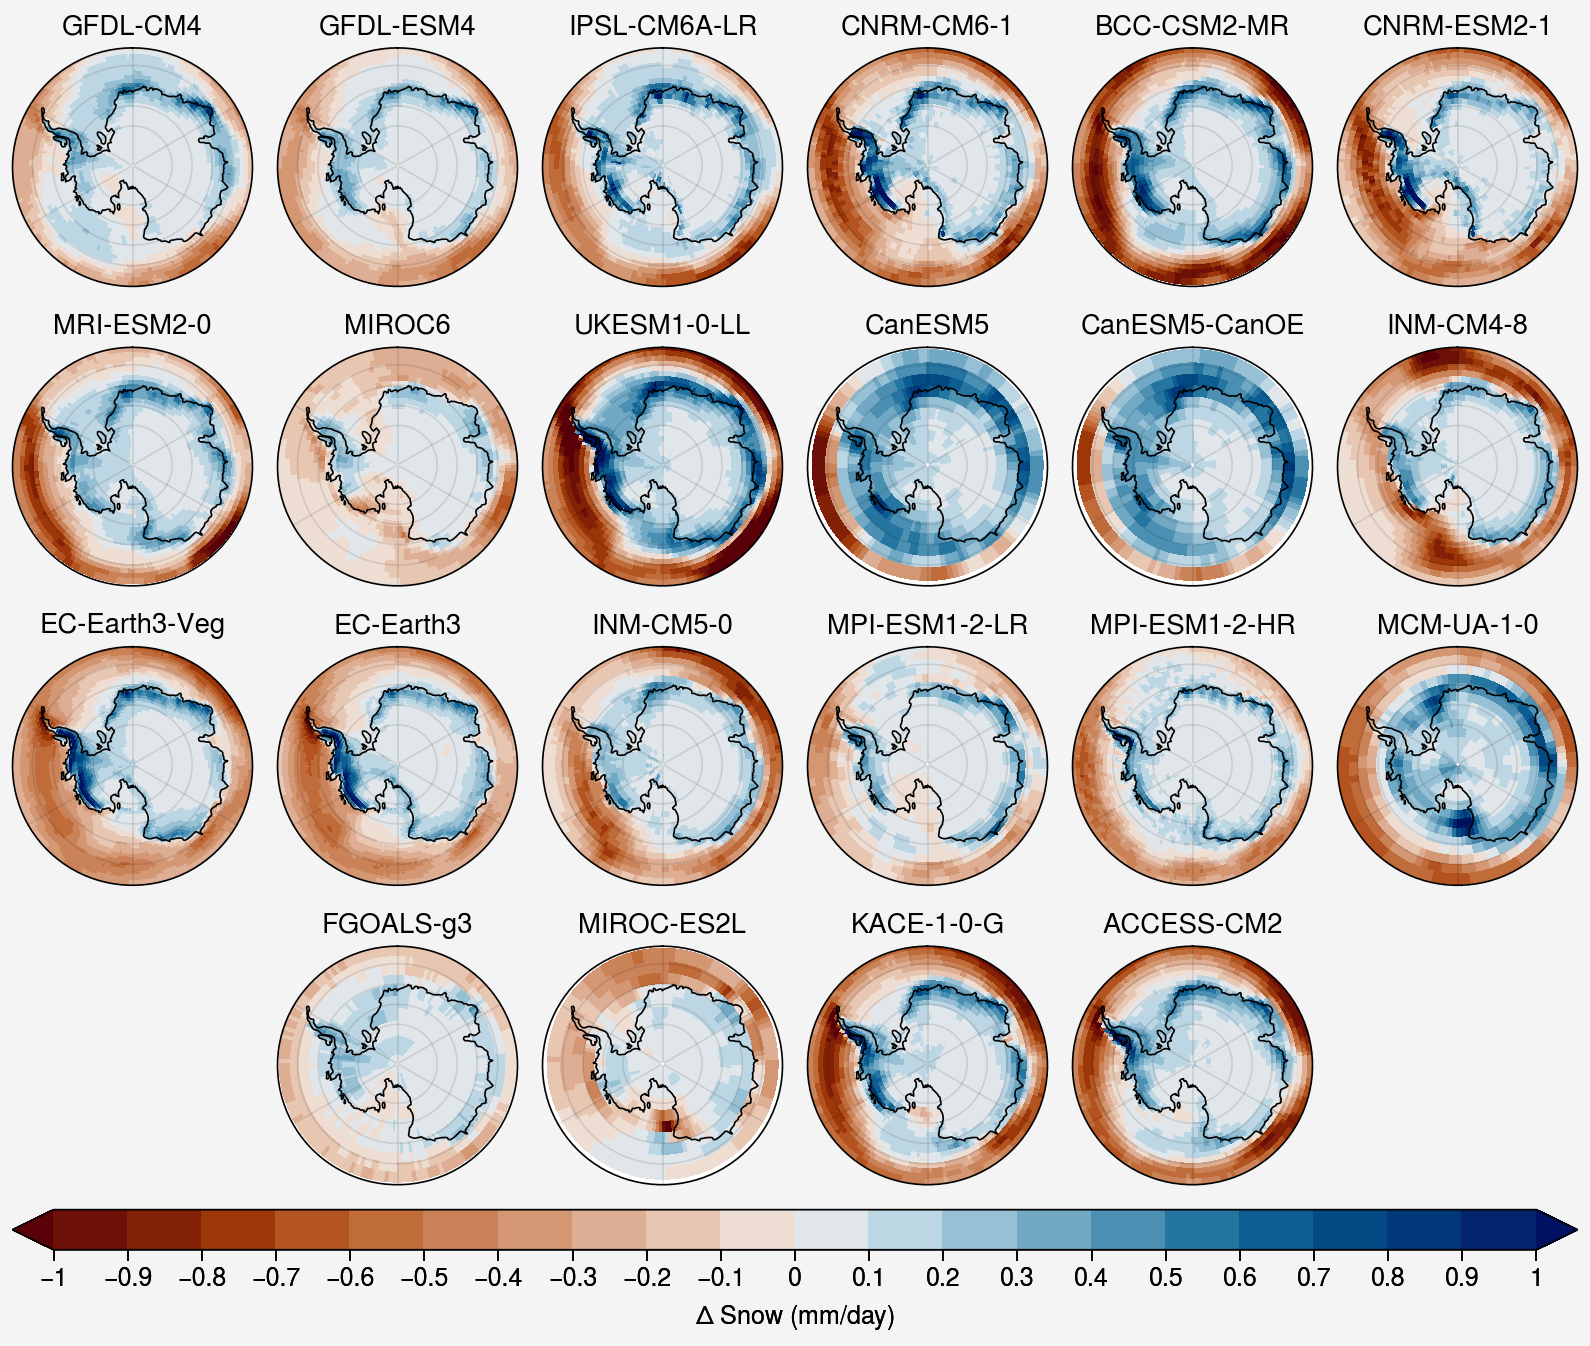

In [17]:
#try out proplot figure
precconv = 3600.*24. #kg/m^2/s*(m^3/1000kg)*(3600*24 s/day)*(1000mm/m)
cmap = 'vik_r'
conts = np.linspace(-1.,1.,21)
basemap = pplt.Proj('spstere')
mysps = [[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[0,19,20,21,22,0]]
fig, axs = pplt.subplots(mysps, refwidth=1.2, proj=basemap)
axs.format(boundinglat=-60., coast=True)

print(len(axs))

for i in range(0,len(model_yes)):
    mylon = lons[model_yes[i]]
    mylat = lats[model_yes[i]]
    m = axs[i].pcolormesh(mylon, mylat, precconv*(np.array(prsn_dict_2070_2100[model_yes[i]+"_0"])-np.array(prsn_dict_1950_1980[model_yes[i]+"_0"])),\
                          levels=conts, cmap=cmap, extend='both')
    axs[i].set_title(model_yes[i])
    
fig.colorbar(m, loc='b', label='$\Delta$ Snow (mm/day)', extendsize='1.7em')
plt.savefig("CMIP6_dSnow_2070to2100_m_1950to1980_042022.pdf")

In [18]:
#set up dictionaries
pr_dict_1950_1980 = {}
lats = {}
lons = {}
variable_id="pr"

#set up AWS filesystem access
fs_s3 = s3fs.S3FileSystem(anon=True)

for imodel in range(0,len(model_yes)):
    print(model_yes[imodel])
    res = catalog.search(source_id=model_yes[imodel], variable_id=variable_id,\
                         experiment_id=experiment_ids[0], table_id=table_id)
    for j in range(0,1):#range(0,len(res.df["zstore"])):
        print(res.df['zstore'][j])
        mapper = fs_s3.get_mapper(res.df['zstore'][j])
        ds = xr.open_zarr(mapper, consolidated=True)
        if j==0:
            try:
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
            except AttributeError:
                ds = ds.rename({"latitude":"lat", "longitude":"lon"})
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
        try:
            pr_dict_1950_1980[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('1950-01','1979-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")
        except (AttributeError, KeyError):
            ds = ds.rename({"latitude":"lat", "longitude":"lon"})
            pr_dict_1950_1980[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('1950-01','1979-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")

GFDL-CM4
s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Amon/pr/gr1/v20180701/
GFDL-ESM4
s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r3i1p1f1/Amon/pr/gr1/v20180701/
IPSL-CM6A-LR
s3://cmip6-pds/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r4i1p1f1/Amon/pr/gr/v20180803/
CNRM-CM6-1
s3://cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/Amon/pr/gr/v20180917/
BCC-CSM2-MR
s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r2i1p1f1/Amon/pr/gn/v20181115/
CNRM-ESM2-1
s3://cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/Amon/pr/gr/v20181206/
MRI-ESM2-0
s3://cmip6-pds/CMIP6/CMIP/MRI/MRI-ESM2-0/historical/r1i1p1f1/Amon/pr/gn/v20190222/
MIROC6
s3://cmip6-pds/CMIP6/CMIP/MIROC/MIROC6/historical/r6i1p1f1/Amon/pr/gn/v20181212/
UKESM1-0-LL
s3://cmip6-pds/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/pr/gn/v20190406/
CanESM5
s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/historical/r11i1p2f1/Amon/pr/gn/v20190429/
CanESM5-CanOE
s3://cmip6-pds/CM

In [19]:
#set up dictionaries
pr_dict_2070_2100 = {}
lats = {}
lons = {}
variable_id="pr"

#set up AWS filesystem access
fs_s3 = s3fs.S3FileSystem(anon=True)

for imodel in range(0,len(model_yes)):
    print(model_yes[imodel])
    res = catalog.search(source_id=model_yes[imodel], variable_id=variable_id,\
                         experiment_id=experiment_ids[1], table_id=table_id)
    for j in range(0,1):#range(0,len(res.df["zstore"])):
        print(res.df['zstore'][j])
        mapper = fs_s3.get_mapper(res.df['zstore'][j])
        ds = xr.open_zarr(mapper, consolidated=True)
        if j==0:
            try:
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
            except AttributeError:
                ds = ds.rename({"latitude":"lat", "longitude":"lon"})
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
        try:
            pr_dict_2070_2100[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('2070-01','2099-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")
        except (AttributeError, KeyError):
            ds = ds.rename({"latitude":"lat", "longitude":"lon"})
            pr_dict_2070_2100[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('2070-01','2099-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")

GFDL-CM4
s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp585/r1i1p1f1/Amon/pr/gr1/v20180701/
GFDL-ESM4
s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Amon/pr/gr1/v20180701/
IPSL-CM6A-LR
s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/Amon/pr/gr/v20190903/
CNRM-CM6-1
s3://cmip6-pds/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1/ssp585/r1i1p1f2/Amon/pr/gr/v20190219/
BCC-CSM2-MR
s3://cmip6-pds/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp585/r1i1p1f1/Amon/pr/gn/v20190314/
CNRM-ESM2-1
s3://cmip6-pds/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp585/r3i1p1f2/Amon/pr/gr/v20190410/
MRI-ESM2-0
s3://cmip6-pds/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ssp585/r1i1p1f1/Amon/pr/gn/v20191108/
MIROC6
s3://cmip6-pds/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp585/r3i1p1f1/Amon/pr/gn/v20190627/
UKESM1-0-LL
s3://cmip6-pds/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/pr/gn/v20190507/
CanESM5
s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r22i1p1f1/Amon/pr/gn/v20190429/
C

In [6]:
variable_id = "pr" #snowfall flux (kg/(m2 s))
table_id = "Amon"
grid = "gn"
experiment_ids = ['historical', 'ssp585']
res = catalog.search(experiment_id=experiment_ids,\
                     table_id=table_id, variable_id=variable_id)
models = res.df['source_id'].unique()
print((res.df['source_id'].unique()))
model_yes = []
for i in models:
    res = catalog.search(source_id=i, variable_id=variable_id, experiment_id=experiment_ids, table_id=table_id) #with Table_id
    if len(res.df['experiment_id'].unique())==len(experiment_ids):
        model_yes.append(i)

print(model_yes)

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'CNRM-ESM2-1' 'MIROC6' 'BCC-ESM1' 'MRI-ESM2-0'
 'SAM0-UNICON' 'CESM2' 'GISS-E2-1-H' 'UKESM1-0-LL' 'CESM2-WACCM' 'CanESM5'
 'CanESM5-CanOE' 'AWI-CM-1-1-MR' 'INM-CM4-8' 'INM-CM5-0' 'HadGEM3-GC31-LL'
 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0' 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR'
 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM' 'GISS-E2-1-G-CC' 'FGOALS-g3'
 'MIROC-ES2L' 'KACE-1-0-G' 'NorCPM1' 'FGOALS-f3-L' 'CNRM-CM6-1-HR'
 'NorESM2-MM' 'ACCESS-CM2' 'ACCESS-ESM1-5' 'GISS-E2-2-H' 'CESM2-WACCM-FV2'
 'CESM2-FV2' 'HadGEM3-GC31-MM' 'FIO-ESM-2-0' 'E3SM-1-1' 'IITM-ESM'
 'EC-Earth3-Veg' 'EC-Earth3' 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR' 'CIESM'
 'CMCC-CM2-SR5' 'E3SM-1-1-ECA' 'TaiESM1' 'EC-Earth3-AerChem'
 'IPSL-CM5A2-INCA' 'CMCC-CM2-HR4' 'CAS-ESM2-0' 'EC-Earth3-CC' 'CMCC-ESM2'
 'MIROC-ES2H' 'ICON-ESM-LR' 'IPSL-CM6A-LR-INCA' 'KIOST-ESM']
['GFDL-CM4', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'GISS-E2-1-G', 'CNRM-CM6-1', 'BCC-CSM2-MR', 'CNRM-ESM2-1', 'MI

In [7]:
print(len(model_yes))

44


In [8]:
#set up dictionaries
pr_dict_1950_1980 = {}
lats = {}
lons = {}
variable_id="pr"

#set up AWS filesystem access
fs_s3 = s3fs.S3FileSystem(anon=True)

for imodel in range(0,len(model_yes)):
    print(model_yes[imodel])
    res = catalog.search(source_id=model_yes[imodel], variable_id=variable_id,\
                         experiment_id=experiment_ids[0], table_id=table_id)
    for j in range(0,1):#range(0,len(res.df["zstore"])):
        print(res.df['zstore'][j])
        mapper = fs_s3.get_mapper(res.df['zstore'][j])
        ds = xr.open_zarr(mapper, consolidated=True)
        if j==0:
            try:
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
            except AttributeError:
                ds = ds.rename({"latitude":"lat", "longitude":"lon"})
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
        try:
            pr_dict_1950_1980[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('1950-01','1979-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")
        except (AttributeError, KeyError):
            ds = ds.rename({"latitude":"lat", "longitude":"lon"})
            pr_dict_1950_1980[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('1950-01','1979-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")

GFDL-CM4
s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Amon/pr/gr1/v20180701/
GFDL-ESM4
s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r3i1p1f1/Amon/pr/gr1/v20180701/
IPSL-CM6A-LR
s3://cmip6-pds/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r4i1p1f1/Amon/pr/gr/v20180803/
GISS-E2-1-G
s3://cmip6-pds/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r2i1p1f1/Amon/pr/gn/v20180827/
CNRM-CM6-1
s3://cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/Amon/pr/gr/v20180917/
BCC-CSM2-MR
s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r2i1p1f1/Amon/pr/gn/v20181115/
CNRM-ESM2-1
s3://cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/Amon/pr/gr/v20181206/
MIROC6
s3://cmip6-pds/CMIP6/CMIP/MIROC/MIROC6/historical/r6i1p1f1/Amon/pr/gn/v20181212/
MRI-ESM2-0
s3://cmip6-pds/CMIP6/CMIP/MRI/MRI-ESM2-0/historical/r1i1p1f1/Amon/pr/gn/v20190222/
CESM2
s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historical/r5i1p1f1/Amon/pr/gn/v20190401/
UKESM1-0-LL
s3://cmip6-pds/CMIP6

In [9]:
#set up dictionaries
pr_dict_2070_2100 = {}
lats = {}
lons = {}
variable_id="pr"

#set up AWS filesystem access
fs_s3 = s3fs.S3FileSystem(anon=True)

for imodel in range(0,len(model_yes)):
    print(model_yes[imodel])
    res = catalog.search(source_id=model_yes[imodel], variable_id=variable_id,\
                         experiment_id=experiment_ids[1], table_id=table_id)
    for j in range(0,1):#range(0,len(res.df["zstore"])):
        print(res.df['zstore'][j])
        mapper = fs_s3.get_mapper(res.df['zstore'][j])
        ds = xr.open_zarr(mapper, consolidated=True)
        if j==0:
            try:
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
            except AttributeError:
                ds = ds.rename({"latitude":"lat", "longitude":"lon"})
                lats[model_yes[imodel]] = ds.lat.sel(lat=slice(-90.,-60.))
                lons[model_yes[imodel]] = ds.lon
        try:
            pr_dict_2070_2100[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('2070-01','2099-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")
        except (AttributeError, KeyError):
            ds = ds.rename({"latitude":"lat", "longitude":"lon"})
            pr_dict_2070_2100[model_yes[imodel]+"_"+str(j)]=ds[variable_id].sel(time=slice('2070-01','2099-12'),\
                                                                             lat=slice(-90.,-60.)).mean(dim="time")

GFDL-CM4
s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp585/r1i1p1f1/Amon/pr/gr1/v20180701/
GFDL-ESM4
s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Amon/pr/gr1/v20180701/
IPSL-CM6A-LR
s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/Amon/pr/gr/v20190903/
GISS-E2-1-G
s3://cmip6-pds/CMIP6/ScenarioMIP/NASA-GISS/GISS-E2-1-G/ssp585/r2i1p1f2/Amon/pr/gn/v20200115/
CNRM-CM6-1
s3://cmip6-pds/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1/ssp585/r1i1p1f2/Amon/pr/gr/v20190219/
BCC-CSM2-MR
s3://cmip6-pds/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp585/r1i1p1f1/Amon/pr/gn/v20190314/
CNRM-ESM2-1
s3://cmip6-pds/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp585/r3i1p1f2/Amon/pr/gr/v20190410/
MIROC6
s3://cmip6-pds/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp585/r3i1p1f1/Amon/pr/gn/v20190627/
MRI-ESM2-0
s3://cmip6-pds/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ssp585/r1i1p1f1/Amon/pr/gn/v20191108/
CESM2
s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585/r4i1p1f1/Amon/pr/gn/v20200528/
UK

44


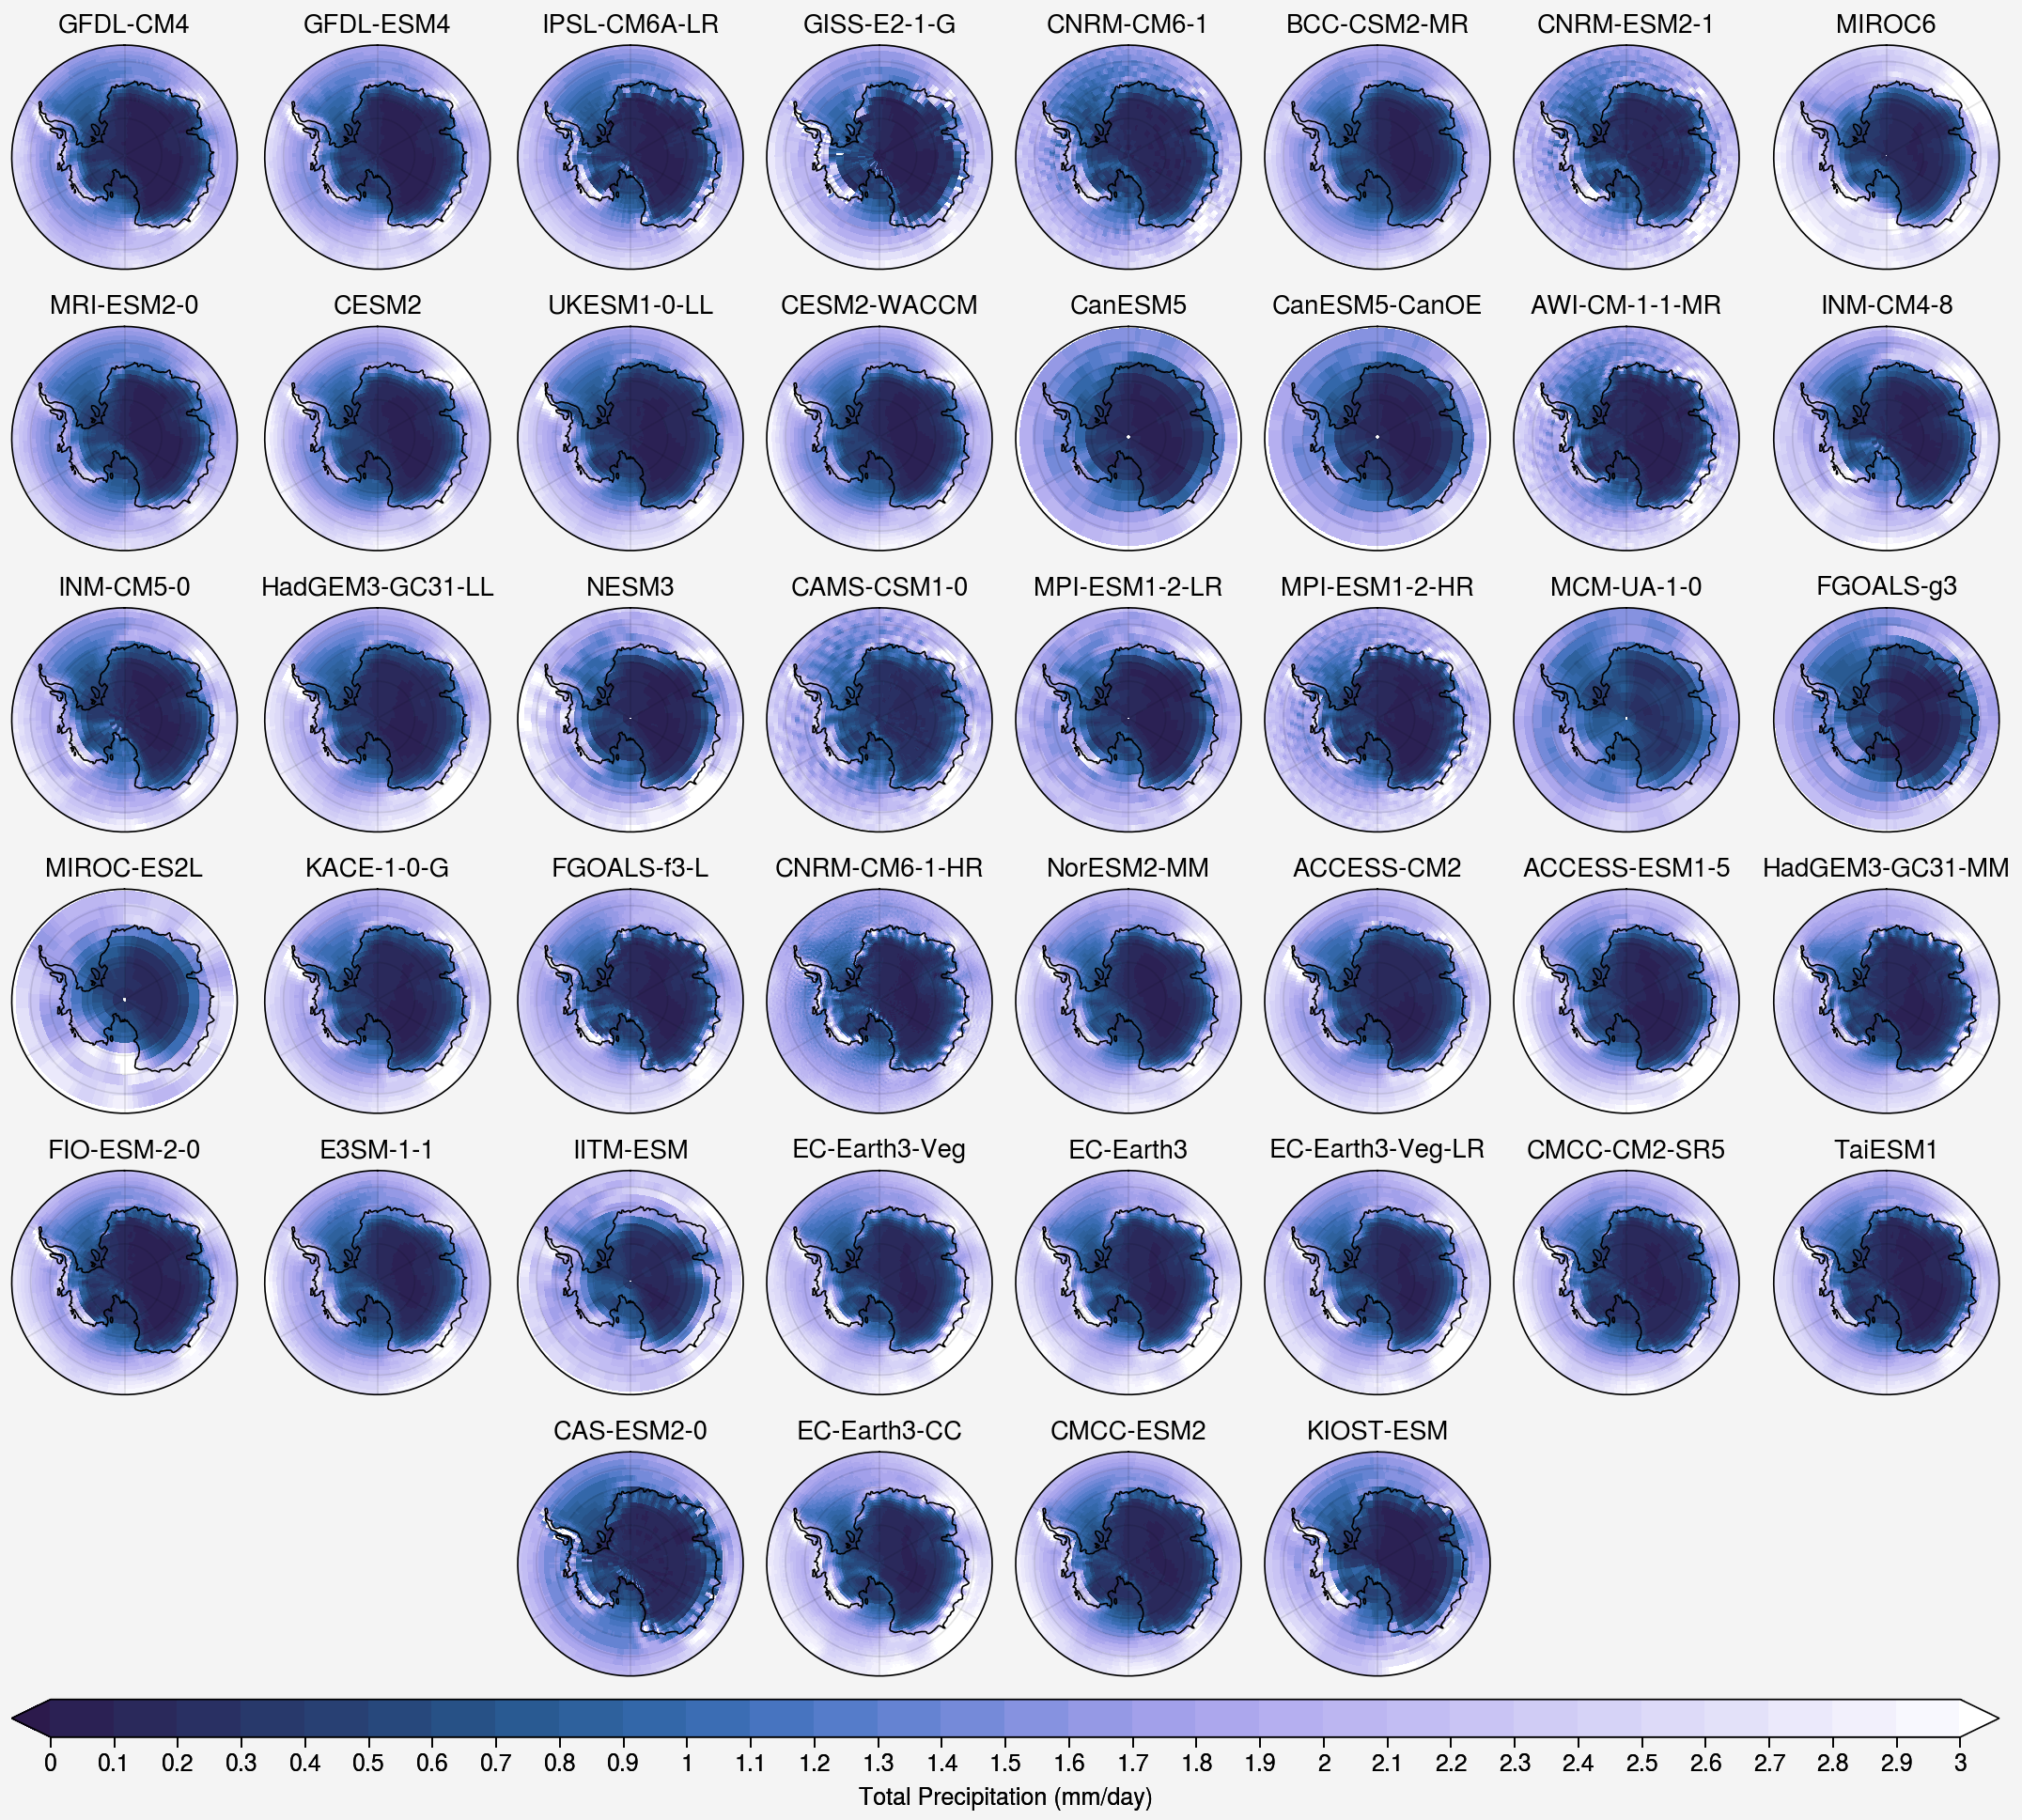

In [10]:
precconv = 3600.*24. #kg/m^2/s*(m^3/1000kg)*(3600*24 s/day)*(1000mm/m)
cmap = 'devon'
conts = np.linspace(0.,3.,31)
basemap = pplt.Proj('spstere')
mysps = [[1,2,3,4,5,6,7,8],[9,10,11,12,13,14,15,16],[17,18,19,20,21,22,23,24],\
        [25,26,27,28,29,30,31,32],[33,34,35,36,37,38,39,40],[0,0,41,42,43,44,0,0]]
fig, axs = pplt.subplots(mysps, refwidth=1.2, proj=basemap)
axs.format(boundinglat=-60., coast=True)

print(len(axs))

for i in range(0,len(model_yes)):
    mylon = lons[model_yes[i]]
    mylat = lats[model_yes[i]]
    m = axs[i].pcolormesh(mylon, mylat, precconv*pr_dict_1950_1980[model_yes[i]+"_0"], levels=conts, cmap=cmap, extend='both')
    axs[i].set_title(model_yes[i])
    
fig.colorbar(m, loc='b', label='Total Precipitation (mm/day)', extendsize='1.7em')
plt.savefig("CMIP6_TotalPrecip_1950to1980_042022.pdf")

44


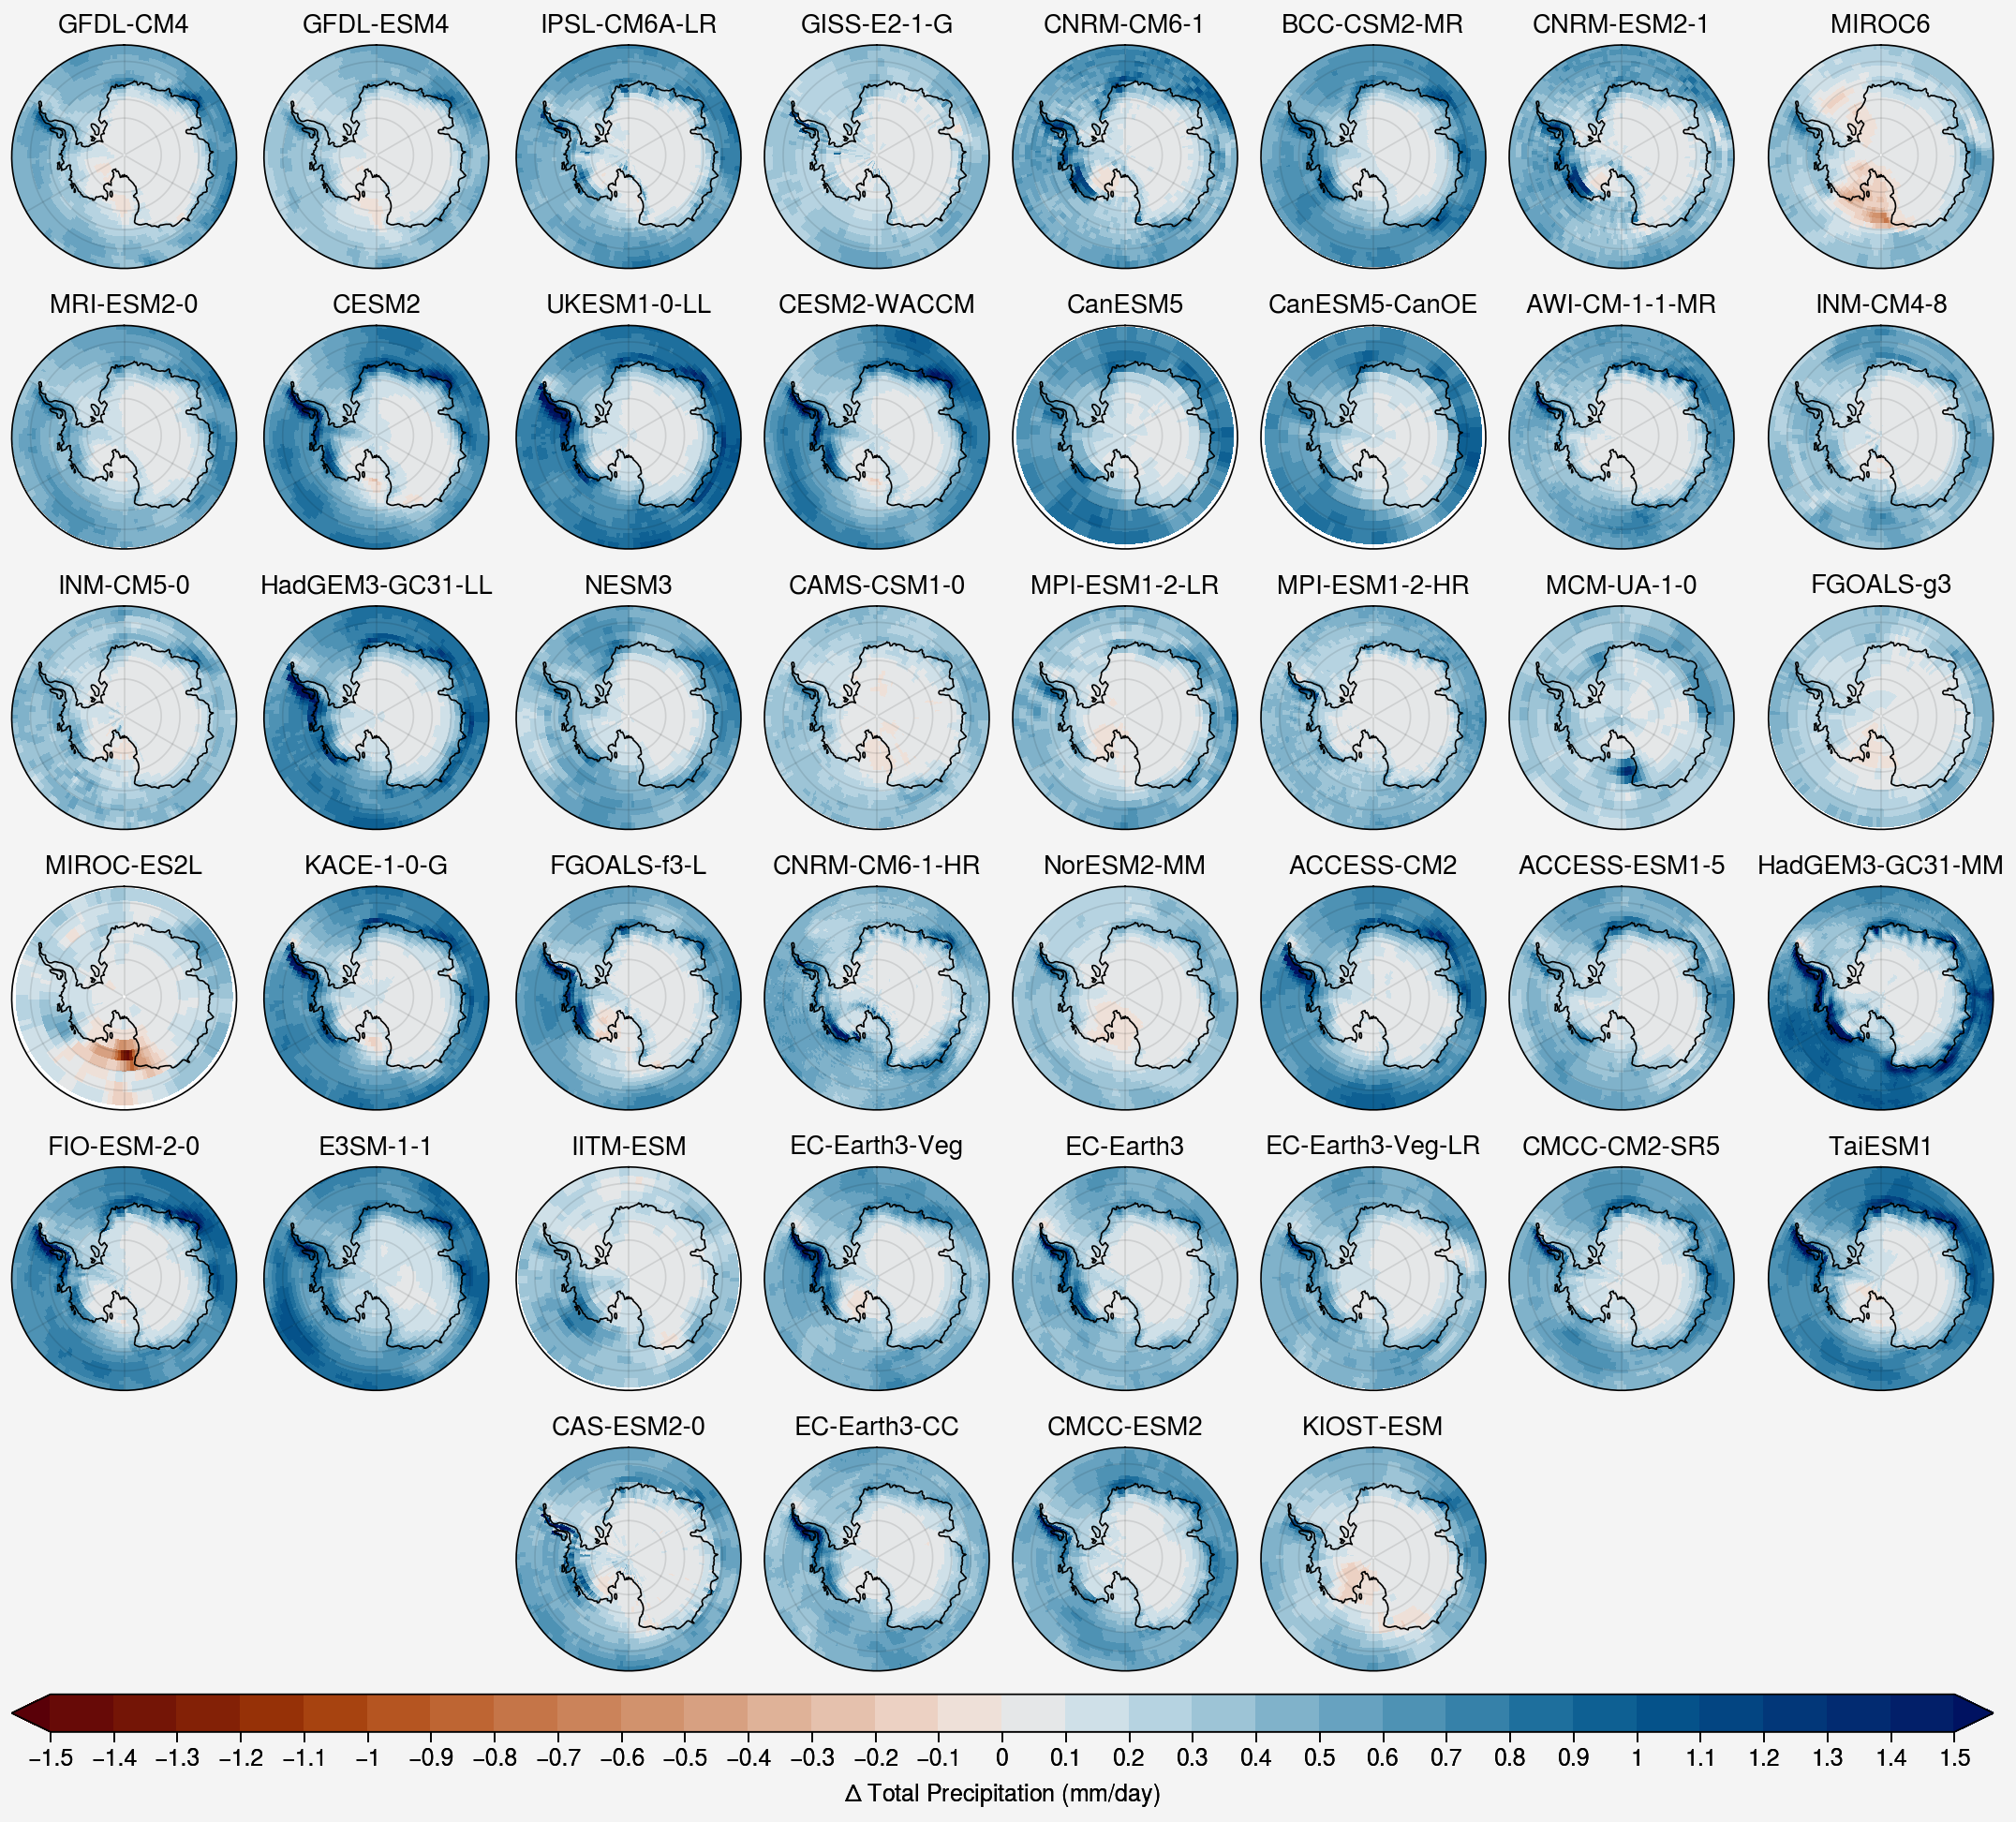

In [11]:
precconv = 3600.*24. #kg/m^2/s*(m^3/1000kg)*(3600*24 s/day)*(1000mm/m)
cmap = 'vik_r'
conts = np.linspace(-1.5,1.5,31)
basemap = pplt.Proj('spstere')
mysps = [[1,2,3,4,5,6,7,8],[9,10,11,12,13,14,15,16],[17,18,19,20,21,22,23,24],\
        [25,26,27,28,29,30,31,32],[33,34,35,36,37,38,39,40],[0,0,41,42,43,44,0,0]]
fig, axs = pplt.subplots(mysps, refwidth=1.2, proj=basemap)
axs.format(boundinglat=-60., coast=True)

print(len(axs))

for i in range(0,len(model_yes)):
    mylon = lons[model_yes[i]]
    mylat = lats[model_yes[i]]
    m = axs[i].pcolormesh(mylon, mylat, precconv*(np.array(pr_dict_2070_2100[model_yes[i]+"_0"])-np.array(pr_dict_1950_1980[model_yes[i]+"_0"])),\
                          levels=conts, cmap=cmap, extend='both')
    axs[i].set_title(model_yes[i])
    
fig.colorbar(m, loc='b', label='$\Delta$ Total Precipitation (mm/day)', extendsize='1.7em')
plt.savefig("CMIP6_dTotPrecip_2070to2100_m_1950to1980_042022.pdf")

In [5]:
variable_id = "uas" #snowfall flux (kg/(m2 s))
table_id = "Amon"
grid = "gn"
experiment_ids = ['historical', 'ssp585']
res = catalog.search(experiment_id=experiment_ids,\
                     table_id=table_id, variable_id=variable_id)
models = res.df['source_id'].unique()
print((res.df['source_id'].unique()))
model_yes = []
for i in models:
    res = catalog.search(source_id=i, variable_id=variable_id, experiment_id=experiment_ids, table_id=table_id) #with Table_id
    if len(res.df['experiment_id'].unique())==len(experiment_ids):
        model_yes.append(i)

print(model_yes)

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'CNRM-ESM2-1' 'MIROC6' 'BCC-ESM1' 'MRI-ESM2-0'
 'GISS-E2-1-H' 'UKESM1-0-LL' 'CanESM5' 'CanESM5-CanOE' 'AWI-CM-1-1-MR'
 'INM-CM4-8' 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3'
 'CAMS-CSM1-0' 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'MCM-UA-1-0'
 'GISS-E2-1-G-CC' 'MIROC-ES2L' 'KACE-1-0-G' 'NorCPM1' 'FGOALS-f3-L'
 'CNRM-CM6-1-HR' 'ACCESS-CM2' 'ACCESS-ESM1-5' 'HadGEM3-GC31-MM' 'IITM-ESM'
 'CIESM' 'EC-Earth3-Veg' 'EC-Earth3' 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR'
 'CAS-ESM2-0' 'CMCC-CM2-SR5' 'EC-Earth3-AerChem' 'IPSL-CM5A2-INCA'
 'CMCC-CM2-HR4' 'EC-Earth3-CC' 'CMCC-ESM2' 'MIROC-ES2H' 'ICON-ESM-LR'
 'IPSL-CM6A-LR-INCA' 'KIOST-ESM']
['GFDL-CM4', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'GISS-E2-1-G', 'CNRM-CM6-1', 'BCC-CSM2-MR', 'CNRM-ESM2-1', 'MIROC6', 'MRI-ESM2-0', 'UKESM1-0-LL', 'CanESM5', 'CanESM5-CanOE', 'AWI-CM-1-1-MR', 'INM-CM4-8', 'INM-CM5-0', 'HadGEM3-GC31-LL', 'NESM3', 'CAMS-CSM1-0', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR

In [ ]:
print(np.max(pr))

In [ ]:
myfig = plt.figure(figsize=[20,30])
myconts_Source = np.linspace(0.,0.3,31)
myconts_WV2 = np.linspace(0., 1., 21)
myconts_tas = np.linspace(-20.,20.,41)
itime0 = 0
#itime1 = 12
panstart = 1

for i in range(itime0,itime0+1):
    myax1, c = StereoMapFig(myfig, 1,3, panstart, -60, mylat, mylon, TSAnom[i,:,:], myconts_tas, \
                                   "RdBu_r")
    #plt.title("Day "+str(i), fontsize=14)
    panstart = panstart+1

for i in range(itime0,itime0+1):
    myax0, c10 = StereoMapFigLog(myfig, 1,3, panstart, -60, mylat, mylon, ColIntVap[i,:,:]*100., myconts_WV2, \
                                   "PuBu")
    myax0.contour(mylon, mylat, TSAnom[i,:,:], [10.], transform=ccrs.PlateCarree(), colors="red", linewidths=2.)
    myax0.set_title("Day "+str(i+1), fontsize=14)
    #plt.title("Day "+str(i), fontsize=14)
    panstart = panstart+1

for i in range(itime0,itime0+1):
    myax, c1 = StereoMapFig(myfig, 1,3, panstart, -1., mylat, mylon, SourceByDayRI[i,:,:]*1000., myconts_Source, \
                                "turbo")
    #data_cyc2, lon_cyc = add_cyclic_point(ColIntVap[i,:,:]*100., coord=mylon)
    #c2 = myax.contour(lon_cyc, mylat, data_cyc2, [0.1], transform=ccrs.PlateCarree(), \
    #                  colors="chartreuse", linewidths=1.)
    #plt.title("Day "+str(i), fontsize=14)
    panstart = panstart+1

plt.subplots_adjust(left=0.135, bottom=0.1, right=0.8, top=0.9)

bbox_ax1 = myax1.get_position()
# fig.add_axes() adds the colorbar axes
# they're bounded by [x0, y0, x_width, y_width]
cbar_im1a_ax1 = myfig.add_axes([0.1, bbox_ax1.y0, 0.01, (bbox_ax1.y1-bbox_ax1.y0)])
cbar_im1a1 = plt.colorbar(c, cax=cbar_im1a_ax1, extend='both')
cbar_im1a1.ax.tick_params(labelsize=14)
cbar_im1a_ax1.yaxis.set_ticks_position('left')
cbar_im1a1.ax.set_ylabel("Temp Anomaly (K)", rotation=90, fontsize=14, labelpad=-58.)

bbox_ax0 = myax0.get_position()
# fig.add_axes() adds the colorbar axes
# they're bounded by [x0, y0, x_width, y_width]
cbar_im1a_ax0 = myfig.add_axes([0.83, bbox_ax0.y0, 0.01, (bbox_ax0.y1-bbox_ax0.y0)])
cbar_im1a0 = plt.colorbar(c10, cax=cbar_im1a_ax0, extend='both')
cbar_im1a0.ax.tick_params(labelsize=14)
cbar_im1a0.ax.set_ylabel("Column Int Vapor (cm)", rotation=270, fontsize=14, labelpad=13.)